In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose

from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sktime.forecasting.model_selection import temporal_train_test_split

import warnings
warnings.filterwarnings("ignore")

sns.set_style()

In [2]:
dados = pd.read_csv(r'D:\Blue EdTech\Bootcamp\dados\full_grouped.csv')

In [3]:
paises = ['Mexico', 'Argentina', 'Ecuador', 'Chile', 'Spain']
df = dados[dados['Country/Region'].isin(paises)]
df['Date'] = pd.to_datetime(df.Date, format="%Y-%m-%d")

## SARIMAX

##### Diferença entre os novos casos por dia

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

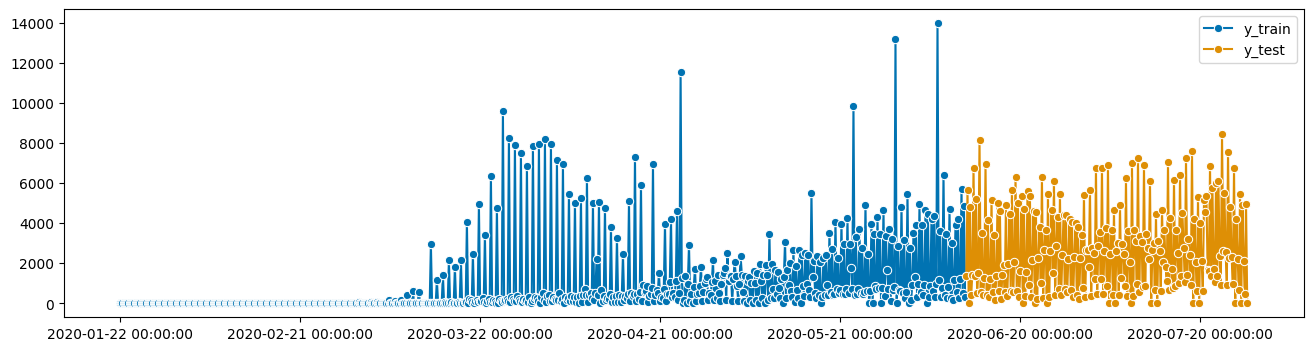

In [4]:
y = pd.Series(df['New cases'].values, df['Date'].values)
y_train, y_test = temporal_train_test_split(y)

plot_series(y_train, y_test, labels=["y_train", "y_test"])

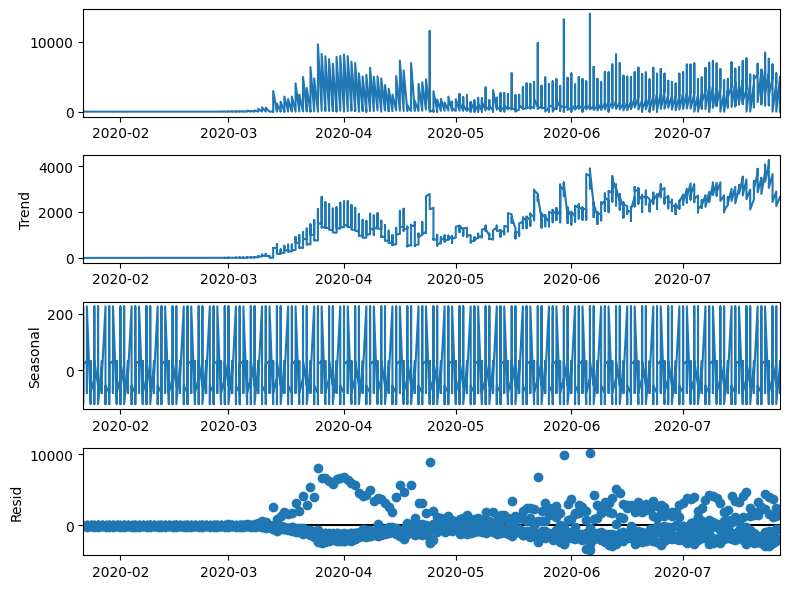

In [5]:
# decompor por semana
result = seasonal_decompose(y, model='additive', period=7)

fig = result.plot()
fig.set_size_inches((8, 6))

fig.tight_layout()
plt.show()

Foi utilizado a função seasonal_decompose da biblioteca stats models para dividir a série em três elementos: Tendência (trend), sazonalidade (seasonal) e resíduo (resid)

##### Aplicando a tecnica de SARIMAX na coluna 'New cases'

In [6]:
#!pip install pmdarima

In [7]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
novos_casos = df[['Date','New cases']].copy()

In [9]:
%%time

# criando o modelo
auto_arima(novos_casos['New cases'],seasonal=True,m=7).summary()

# ajustando o modelo
# colocamos os parametros start_p e start_q em 0 para
# serem os valores iniciais de treino e colocamos os 
# parametros max_p e max_q nos valores finais. 
# m=7 que será de observacoes diária
stepwise_fit = auto_arima(novos_casos['New cases'], start_p=0, start_q=0, 
    max_p=6, max_q=3, m=7,
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=17519.376, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=17696.018, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=17164.382, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=17694.018, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=17170.874, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=17084.491, Time=0.57 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=16930.207, Time=1.68 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=17068.265, Time=0.30 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=16740.685, Time=1.69 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=16932.776, Time=1.87 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=16661.226, Time=2.72 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=17297.347, Time=1.48 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=17025.094, Time=1.78 sec
 ARIMA(0,1,1)(2,0,2)[7] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  940
Model:             SARIMAX(6, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -7812.491
Date:                                Wed, 07 Dec 2022   AIC                          15648.981
Time:                                        17:36:47   BIC                          15707.119
Sample:                                             0   HQIC                         15671.145
                                                - 940                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0658      0.067     -0.978      0.328      -0.198       0.066
ar.L2         -0.2108      0.036     -5.889      0.000      -0.281      -0.141
ar.L3         -0.1325      0.048     -2.785      0.005      -0.226      -0.039
ar.L4         -0.1369      0.054     -2.536      0.011      -0.243      -0.031
ar.L5          0.5595      0.039     14.221      0.000       0.482       0.637
ar.L6         -0.0750      0.061     -1.221      0.222      -0.195       0.045
ma.L1         -0.9501      0.022    -44.086      0.000      -0.992      -0.908
ar.S.L7        0.6284      0.032     19.671      0.000       0.566       0.691
ar.S.L14      -0.9396      0.026    -36.649      0.000      -0.990      -0.889
ma.S.L7       -0.5477      0.054    -10.208      0.000      -0.653      -0.443
ma.S.L14       0.7981      0.049     16.450      0.000       0.703       0.893
sigma2       1.12e+06   2.35e+04     47.665      0.000    1.07e+06    1.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             54439.23
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               8.51   Skew:                             2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
%%time

cut = int(novos_casos.shape[0] * 0.80)
train = novos_casos.iloc[:cut]
test = novos_casos.iloc[cut:]

# modelo
model = SARIMAX(train['New cases'],order=(6,1,1),seasonal_order=(2,0,[1,2],7))
model_fit = model.fit()
model_fit.summary()

CPU times: total: 6.05 s
Wall time: 7.03 s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              New cases   No. Observations:                  752
Model:             SARIMAX(6, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -6279.807
Date:                                Wed, 07 Dec 2022   AIC                          12583.614
Time:                                        17:36:58   BIC                          12639.071
Sample:                                             0   HQIC                         12604.981
                                                - 752                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0849      0.095     -0.898      0.369      -0.270       0.100
ar.L2         -0.2033      0.047     -4.306      0.000      -0.296      -0.111
ar.L3         -0.1543      0.047     -3.269      0.001      -0.247      -0.062
ar.L4         -0.1724      0.064     -2.704      0.007      -0.297      -0.047
ar.L5          0.5757      0.047     12.264      0.000       0.484       0.668
ar.L6         -0.1119      0.090     -1.236      0.216      -0.289       0.066
ma.L1         -0.9442      0.029    -33.082      0.000      -1.000      -0.888
ar.S.L7        0.3266      0.055      5.989      0.000       0.220       0.434
ar.S.L14      -0.8679      0.059    -14.602      0.000      -0.984      -0.751
ma.S.L7       -0.1783      0.054     -3.313      0.001      -0.284      -0.073
ma.S.L14       0.9087      0.050     18.074      0.000       0.810       1.007
sigma2      1.229e+06   3.54e+04     34.734      0.000    1.16e+06     1.3e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             41168.61
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):            1554.76   Skew:                             3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

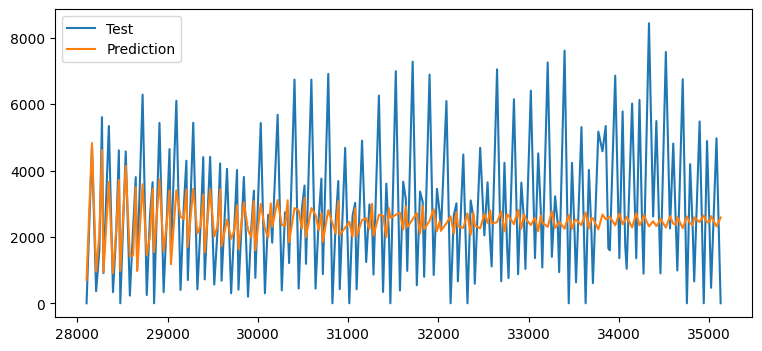

CPU times: total: 234 ms
Wall time: 1.34 s


In [11]:
%%time

start = train.shape[0]
end   = novos_casos.shape[0] - 1

pred = model_fit.predict(start=start, end=end, dynamic=False, typ='levels')
pred.index = test.index

plt.figure(figsize=(14,10))
test['New cases'].plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction', figsize=(9,4))
plt.show()

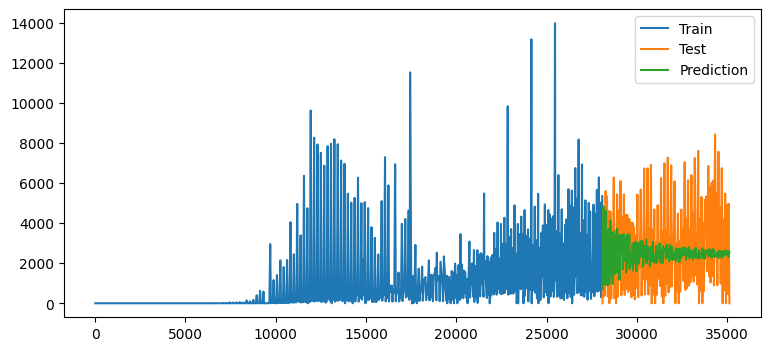

In [12]:
plt.figure(figsize=(14,10))
train['New cases'].plot(legend=True, label='Train')
test['New cases'].plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction', figsize=(9,4))
plt.show()

In [13]:
print(f"MAE  ---  {mean_absolute_error(test['New cases'], pred):.2f}")
print(f"MAPE ---  {mean_absolute_percentage_error(test['New cases'], pred)}")

MAE  ---  1598.92
MAPE ---  7.005516650594642e+17


## Modelo ThetaForecaster

In [14]:
#from xgboost import XGBRegressor

from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import MeanAsymmetricError
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
#from sktime.performance_metrics.forecasting import smape_loss

In [15]:
%%time

y_train, y_test = temporal_train_test_split(y)
fh = np.arange(1, len(y_test) + 1)  
forecaster = ThetaForecaster(sp=12, deseasonalize=False)  
forecaster.fit(y_train.values)
y_pred = forecaster.predict(fh)
#smape_loss(y_test, y_pred) #0.08661469103230263
#MeanAbsolutePercentageError(y_test, y_pred)

CPU times: total: 15.6 ms
Wall time: 580 ms


Erro Médio Absoluto (MAE), que é a média dos erros absolutos (ignorando o sinal positivo ou negativo). Assim sabemos melhor quanto estamos desviando dos valores reais nas unidades originais.

Erro Percentual Absoluto Médio (MAPE). É uma métrica bastante utilizada na área de previsões de séries temporais, e se refere à média do percentual de erros cometidos nas previsões, desconsiderando a direção (acima ou abaixo do real).

In [16]:
print(f'MAE  ---  {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MAPE ---  {mean_absolute_percentage_error(y_test, y_pred)}')

MAE  ---  1827.85
MAPE ---  6.731194031802877e+17


## ADF

In [17]:
serie_casos = y.copy()

In [18]:
# extrair apenas os valores
X = serie_casos.values

# aplicar ADF e imprimir o resultado
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -1.2676
Valor-p: 0.6439
Valores Críticos:
	1%: -3.4375
	5%: -2.8647
	10%: -2.5684


A estatística ADF, usada no teste, é um número negativo, e quanto mais negativo, mais indicativo o teste se torna de rejeitar a hipótese nula de que existe raiz unitária na série. Resumidamente, o ADF tem a capacidade de nos dizer se uma time series é estacionária ou não.

* A Hipótese Nula (H0) do teste é que a time series não é estacionária. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa (H1) rejeita a hipótese nula, ou seja, que a time series é estacionária.

O valor-p está 0.6439 e o teste estatísticos está maior que os valores críticos, ou seja nossa serie não é estacionária e precisamos transforma-la em estacionária! (testar)

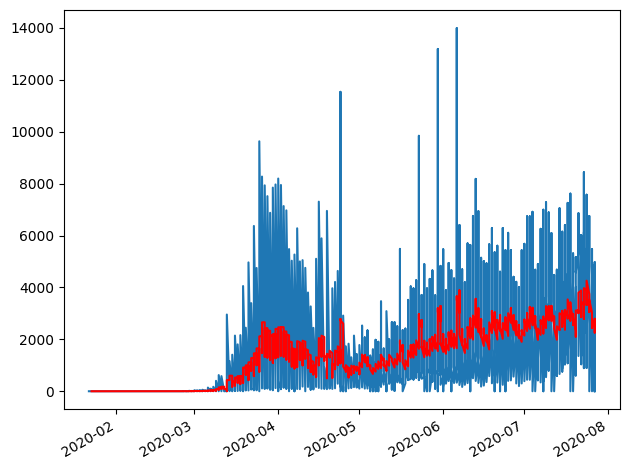

In [19]:
ma = serie_casos.rolling(7).mean()

fig, ax = plt.subplots()
serie_casos.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

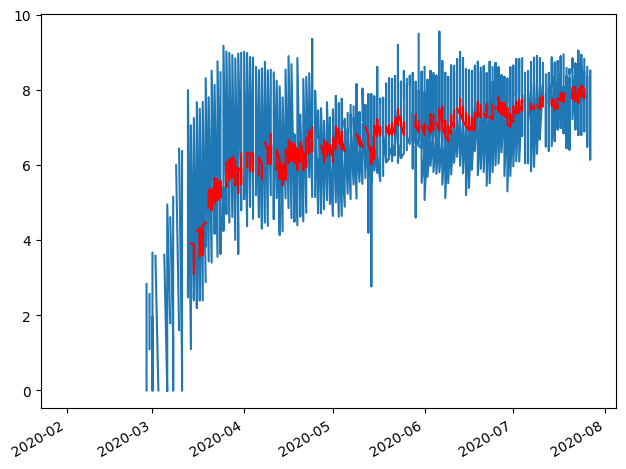

In [20]:
df_log = np.log(serie_casos)
ma_log = df_log.rolling(7).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

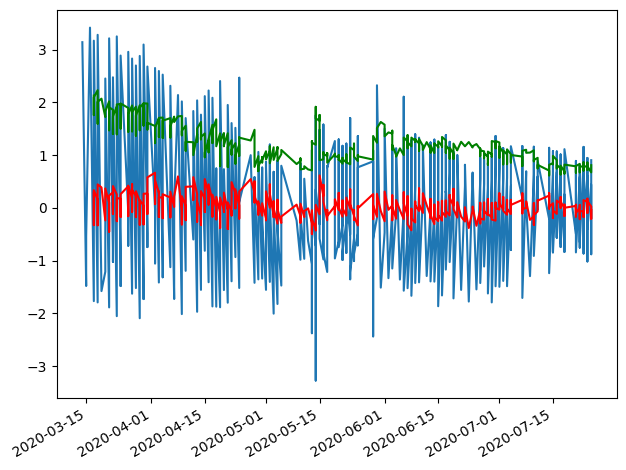

In [21]:
#subtrair média do log dos dados, iremos fazer a média em 12, pois iremos fazer anualmente
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(7).mean()
#desvio padrão
std_sub = df_sub.rolling(7).std()

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color='r')
std_sub.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

Depois de fazer o log, media movel, remover os NaN e definir o desvio padrão; agora será feito o teste ADF para provar cientificamente que se transformou em estacionária

In [22]:
#repetir o ADF
X_sub = df_sub.values

# aplicar ADF e imprimir o resultado
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -10.3162
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4449
	5%: -2.8680
	10%: -2.5702


Para reduzir ainda mais o valor-p, e tornar mais estacionaria ainda a serie, será realizado tecnica de diferenciação.

Dickey-Fuller Aumentado
Teste Estatístico: -9.5598
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4449
	5%: -2.8680
	10%: -2.5702


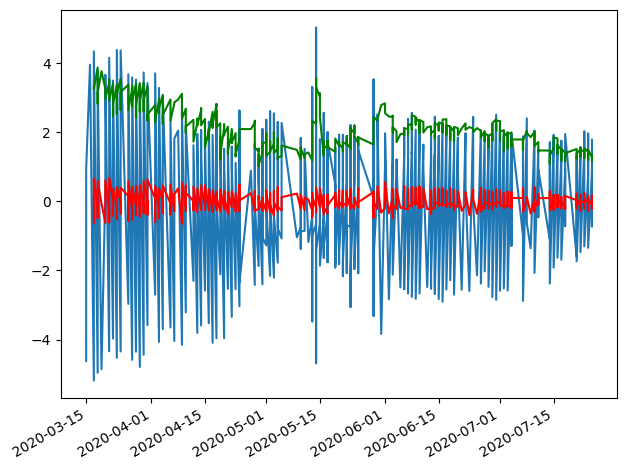

In [23]:
#Diferenciação

#aplicar diferenciação
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(7).mean()
#desvio padrão
std_diff = df_diff.rolling(7).std()

#plotar a diferenciação
fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

#extrair apenas os valores e retirar os valores NA
X = df_diff.dropna().values

# aplicar ADF e imprimir o resultado
result_diff = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

In [24]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

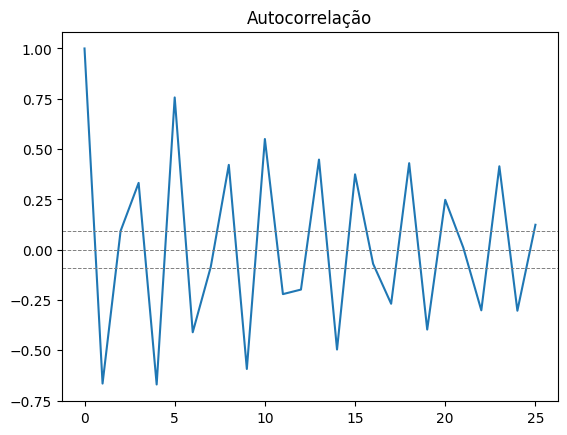

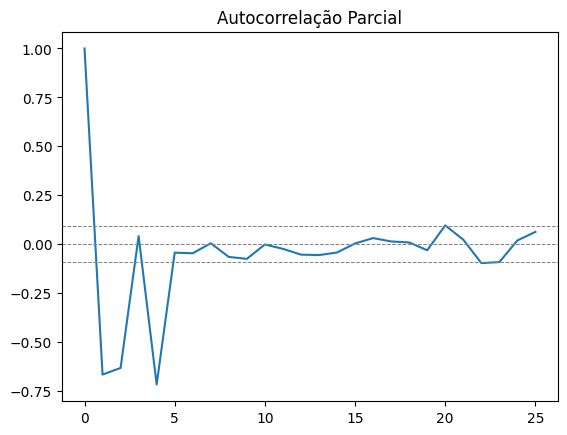

In [25]:
# plotar ACF e PACF

plt.plot(lag_acf)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

Depois de reduzir o valor-p para 0, transformando a serie temporal em estacionaria; será feito o forecast com ARIMA

In [41]:
serie_ADF = df_log.replace([np.inf, -np.inf], np.nan)
serie_ADF.dropna(inplace=True)

2020-01-22         NaN
2020-01-22         NaN
2020-01-22         NaN
2020-01-22         NaN
2020-01-22         NaN
                ...   
2020-07-27    8.494948
2020-07-27    7.665285
2020-07-27    6.146329
2020-07-27    8.511779
2020-07-27         NaN
Length: 940, dtype: float64

In [45]:
# criando o modelo
auto_arima(serie_ADF,seasonal=True,m=7).summary()

# ajustando o modelo
# colocamos os parametros start_p e start_q em 0 para
# serem os valores iniciais de treino e colocamos os 
# parametros max_p e max_q nos valores finais. 
# m=7 que será de observacoes diária
stepwise_fit_2 = auto_arima(serie_ADF, start_p=0, start_q=0, 
    max_p=6, max_q=3, m=7,
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)

stepwise_fit_2.summary()

KeyboardInterrupt: 

In [28]:
cut_2 = int(serie_ADF.shape[0] * 0.80)
train_2 = serie_ADF.iloc[:cut_2]
test_2 = serie_ADF.iloc[cut_2:]

start_2 = train_2.shape[0]
end_2   = serie_ADF.shape[0] - 1

In [29]:
model_2 = SARIMAX(train_2, order=(6,1,3))
result_AR = model_2.fit(disp= -1)

In [30]:
pred_2 = result_AR.predict(start=start_2, end=end_2, dynamic=False, typ='levels')
pred_2.index = test_2.index

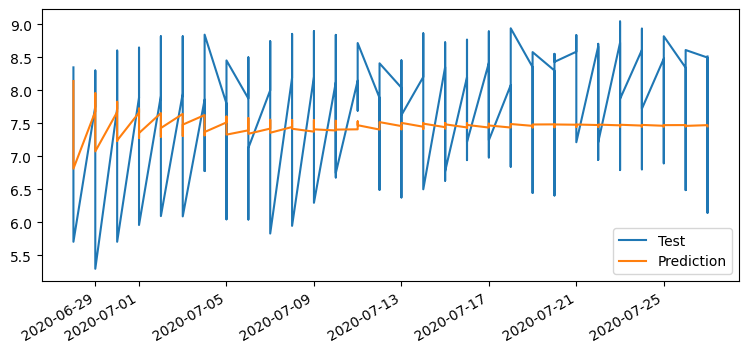

In [31]:
plt.figure(figsize=(14,10))
test_2.plot(legend=True, label='Test')
pred_2.plot(legend=True, label='Prediction', figsize=(9,4))
plt.show()

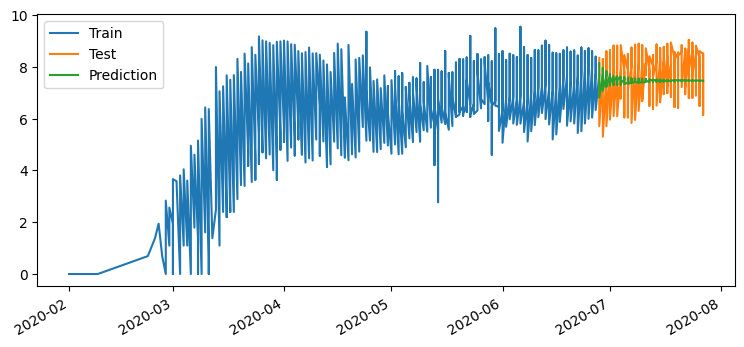

In [32]:
plt.figure(figsize=(14,10))
train_2.plot(legend=True, label='Train')
test_2.plot(legend=True, label='Test')
pred_2.plot(legend=True, label='Prediction', figsize=(9,4))
plt.show()

Podemos ver a previsão feita pelo SARIMAX em verde, depois da utilização da ADF para transformar a serie temporal em estacionaria obteve um grafico mais ajustado aos dados de teste (no primeiro momento, depois de rodar o modelo novamente não apresentou os mesmos resultados). O proximo passo será observar as metricas MAE e MAPE.

In [39]:
print(f'MAE  ---  {mean_absolute_error(test_2, pred_2):.2f}')
print(f'MAPE ---  {mean_absolute_percentage_error(test_2, pred_2)}')

MAE  ---  0.75
MAPE ---  0.09982623180011603
